In [1]:
'''
*********************************************************
** Day2 Summer of ML 2021
** Least Squares Linear Regression via Gradient Descent
** @Author: Aman Bhardwaj
** @Date: 16-Jan-2021
*********************************************************
'''

# import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
from matplotlib import cm

# %matplotlib widget
# plt.ion()

In [2]:
#standardize data
def std_data(Z):
    Z = (Z-np.mean(Z))/np.std(Z)
    return Z

Original Parameters THETA0 = 1, THETA1 = -0.5
Number of Features = 1
Number of Samples = 100


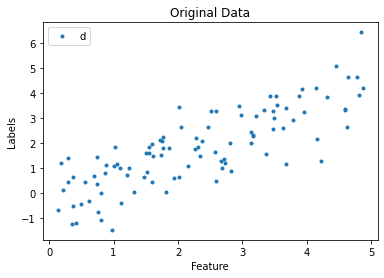

In [3]:
# Generate Data
N = 100
T0 = -0.5     # THETA0
T1 = 1          # THETA1
THETA = np.array([T1, T0]).reshape(-1,1)
X = 5*np.random.rand(N,1)
# X = std_data(X)
X = np.c_[X, np.ones(N)]

noise = 0.8*np.random.randn(N).reshape(-1,1)
Y = X @ THETA + noise    # Y = X*Theta + e
# Y = std_data(Y)

print("Original Parameters THETA0 = {}, THETA1 = {}".format(T1,T0))
print("Number of Features = {}".format(1))
print("Number of Samples = {}".format(N))
# Plot Original Data
fig = plt.figure()
plt.plot(X[:, 0], Y, '.')
plt.xlabel("Feature")
plt.ylabel("Labels")
plt.legend("data points")
plt.title("Original Data")
plt.show()

In [4]:
def mse_loss(Y, X, THETA):
    '''
    Loss/Objective Function.
    Mean Squared Error / Least Squared Error
    
    INPUTS:
    X: Data Features
    Y: Labels
    THETA: Parameters
    
    RETURNS:
    mse: Mean Squared Loss Value
    '''
    n = len(Y)
    sum_of_least_sq = sum((Y- X @ THETA)**2)
    
    mse = sum_of_least_sq/2*n
    return mse

def gradient(Y, X, THETA):
    '''
    Gradient for Loss/Objective Function.
    
    INPUTS:
    X: Data Features
    Y: Labels
    THETA: Parameters
    
    RETURNS:
    grad: Gradient Shape = (2,1)
    '''
        
    temp = Y - X @ THETA
    grad = -0.5*(X.T @ temp)
    return grad

def gradient_descent(X, Y, lr = 0.001, max_iter = 10000, eps = 1e-6):
    '''
    Gradient Descent Algorithm for Linear Regression
    
    INPUTS:
    X: Data Features
    Y: Labels
    lr: learning rate / step size
    max_iter = stopping criteria maximum number of iterations
    eps = stopping criteria for relative error change
    
    RETURNS:
    theta: Calculated Model Parameters Shape = (2,1)
    error_list: error values for each iteration
    '''
    
    iteration = 0
    theta = np.zeros(2).reshape(-1,1)    #Initialize Weights to ZERO
    J = mse_loss(Y, X, theta)
    error_list = [J[0]]
    error_change = 100
    t0_list = [0]
    t1_list = [0]
    
    while iteration < max_iter and error_change > eps:
        iteration += 1
        
        grad = gradient(Y, X, theta)    #Calculate Gradient  
        theta = theta - lr*grad         #Update Weights
        
        J = mse_loss(Y, X, theta)       # Calculate Error
        
        error_change = (error_list[-1] - J)/J    #relative error change
        
        #keep track of values
        error_list.append(J[0])   
        t0_list.append(round(theta[1][0],4))
        t1_list.append(round(theta[0][0],4))
    
    return theta, error_list, t0_list, t1_list

def get_decision_line(theta):
    x = np.linspace(0, max(X[:,0]), 20)
    x = np.c_[x, np.ones(20)]    
    y = x @ theta
    return x,y

Original Value of THETA1 = 1
Estimated Value of THETA1 = 0.9187
Original Value of THETA0 = -0.5
Estimated Value of THETA0 = -0.3037


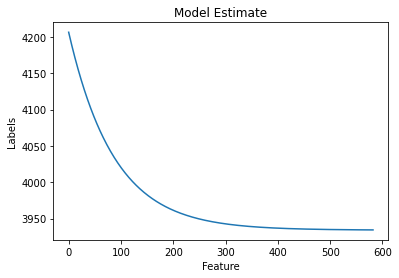

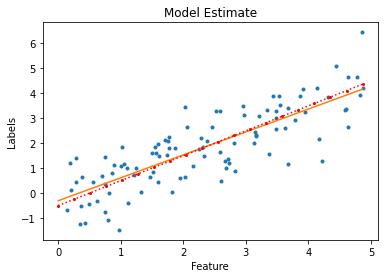

In [5]:
# perform gradient descent
THETA_recon, J_list, T0_list, T1_list = gradient_descent(X, Y, lr = 0.0005)
print("Original Value of THETA1 =", T1)
print("Estimated Value of THETA1 =", round(THETA_recon[0][0],4))
print("Original Value of THETA0 =", T0)
print("Estimated Value of THETA0 =", round(THETA_recon[1][0],4))

# Plot Data
fig = plt.figure()
plt.plot(J_list[35:])
plt.xlabel("Feature")
plt.ylabel("Labels")
plt.title("Model Estimate")
plt.show()

# Plot Data
fig = plt.figure()
plt.plot(X[:, 0], Y, '.')
x, y = get_decision_line(np.array(THETA_recon).reshape(-1,1))
plt.plot(x[:,0], y)
x, y = get_decision_line(np.array(THETA).reshape(-1,1))
plt.plot(x[:,0], y, marker='o', color='red',fillstyle = 'full', linestyle='dotted', markersize=2,  zorder= 10)
plt.xlabel("Feature")
plt.ylabel("Labels")
plt.title("Model Estimate")
plt.show()

In [6]:
def surface_plot(t0, t1, jtList, animate):
    '''
    Plot 3D surface plot to demonstrate gradient descent
    
    INPUTS:
    t0: (List) THETA0 values per iteration
    t1: (List) THETA1 values per iteration
    jtList: (List) Loss function values per iteration
    animate: (Boolean)
    '''
    
    
    #Mesh for 3D Plot
    xGrid = np.linspace(-2,2,25)
    yGrid = np.linspace(0,1,25)
    xGrid, yGrid = np.meshgrid(xGrid, yGrid)
    J = np.zeros(xGrid.shape)

    gridValues = np.array([xGrid.flatten(), yGrid.flatten()])
    gridValues = gridValues.T
    jThetaValues = []
    for row in gridValues:
        jThetaValues.append(mse_loss(Y, X, row.reshape(-1,1))/10)
    
    J = np.array(jThetaValues).reshape(xGrid.shape)
    
    figS = plt.figure()
    ax =  figS.gca(projection="3d")
    
    sPlot = ax.plot_surface(xGrid, yGrid, J,cmap='cool', edgecolor='none', zorder=5)
    ax.set_title('3D Mesh with Error Function Converge')

    ax.set_zlabel('J(theta)',labelpad=5)
    figS.colorbar(sPlot)

    if animate:
        for i in range(len(jtList) - 1):
            
            ax.plot([t0[i], t0[i + 1]], [t1[i], t1[i + 1]], [jtList[i], jtList[i + 1]], 
                    color='red', marker='o',fillstyle = 'full', linestyle='dotted', markersize=5,  zorder= 10)
            figS.canvas.draw()            
            plt.pause(0.1)
    else:
        
        ax.plot(t0, t1, jtList, 'ro', fillstyle = 'full', linestyle='dotted', markersize=3, zorder= 10)
        
    return

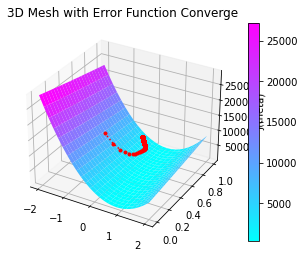

In [7]:
surface_plot(T0_list[1:], T1_list[1:], J_list[1:], False)